In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PYTHON/DATA FILES/product recommendation /ratings_Beauty.csv')

In [ ]:
df = df.dropna()
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [ ]:
df.shape

(2023070, 4)

1. RECOMMENDING BASED ON MOST POPULAR PRODUCTS SOLD


(its not done by the reviews of the product. it is done by the number of reviews of the product assuming more reviews == more sales done)

In [ ]:
popular_products = pd.DataFrame(df.groupby('ProductId')['Rating'].count())   #the pd.DataFrame creates a new df
most_popular_df = popular_products.sort_values('Rating', ascending = False)
most_popular_df.head(10)

# here, we're basically creating another database by grouping the product id column and counts the number of ratings for each product
# the new database consists only of 2 columns - product id as index and rating counts as the only column

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

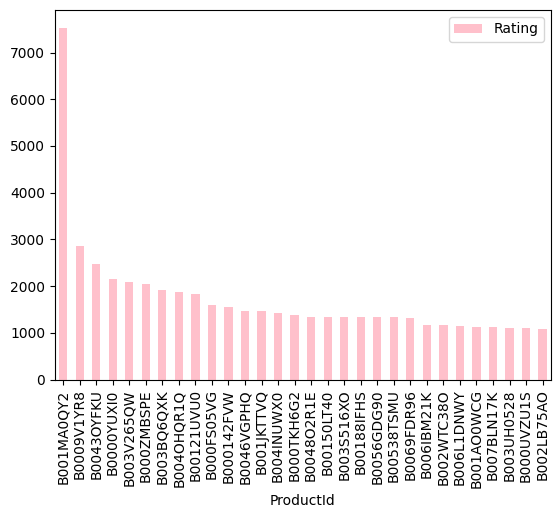

In [ ]:
most_popular_df.head(30).plot(kind = "bar", color = "pink")

2. RECOMMENDATION BASED ON HISTORY AND SIMILARITY

In [ ]:
ratings_df = df.head(10000)

In [ ]:
ratings_utility_matrix = ratings_df.pivot_table(values = 'Rating', index = 'UserId', columns = 'ProductId', fill_value = 0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ratings_utility_matrix.shape

(9697, 886)

In [ ]:
# transposing the matrix
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(886, 9697)

In [ ]:
# DECOMPOSING THE MATRIX
SVD = TruncatedSVD(n_components=10)    # here 10 is the number of dimensions we are reducing the matrix to
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape
# here, the number of users are the features, and they have been reduced to 10

(886, 10)

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)  #the corrcoef makes the main feature as rows. that is why the resulting matrix is dependent on the rows, not columns
correlation_matrix.shape

(886, 886)

the interactive recommendation segment starts here

In [ ]:
X.index[99]   #we're accessing the value located at the 99th position in the index of the df X

'6117036094'

In [ ]:
i = input("enter the product id value: ")

product_names = list(X.index)     #here, we're creating a list that stores all the values from the df X, and holds the product ids or names
product_ID = product_names.index(i)    #we use the index method to find the corresponding index of the product that we want
product_ID
# checking if the vice versa will work

enter the product id value: 6117036094


99

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]    #here, the row corresponding to the product id of the correlation matrix is retrieved
correlation_product_ID.shape  #here, since the array is a 1d array, the columns value is blank in the shape value
# here, we're trying to specifically access a row from the corr matrix, based on the product id
# it is a 1d array since it just represents the corr of product id with all other products
# each element in the array just corresponds to the corr value of the products

(886,)

In [ ]:
Recommended_items = list(X.index[correlation_product_ID > 0.90])    #the output will be given as a list
Recommended_items.remove(i)   # Removes the item already bought by the customer
Recommended_items[0:9]   #recommends the first 10 products that have the highest corr score which means they are the most highly related to eachother

# here, we're setting the correlation threshold at 0.90 and only recommending products that are more related than that

['0733001998',
 '1304351475',
 '1304482634',
 '1879187396',
 '1987958179',
 '3292000971',
 '5357955786',
 '5357955948',
 '5357956227']